In [1]:
import allel
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1000G Dataset

In [2]:
# with open('data/1000G/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz', mode='rb') as vcf:
#     print(vcf.read())

In [2]:
callset = allel.read_vcf('data/1000G/ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz' )

In [3]:
# Here are the available keys:
sorted(callset.keys())

['calldata/GT',
 'samples',
 'variants/ALT',
 'variants/CHROM',
 'variants/FILTER_PASS',
 'variants/ID',
 'variants/POS',
 'variants/QUAL',
 'variants/REF']

In [4]:
# The 'samples' array contains sample identifiers extracted from the header line in the CVF file
print(callset['samples'])
len(callset['samples'])

['HG00096' 'HG00097' 'HG00099' ... 'NA21142' 'NA21143' 'NA21144']


2504

In [5]:
# All array with keys beginning 'variants/' come from the fixed fields in the VCF file.
# Here are the data from each 'FIELDS' field. 
print("CHROM = \n", callset['variants/CHROM'])
print("POS = \n", callset['variants/POS'])
print("ID = \n", callset['variants/ID'])
print("REF = \n", callset['variants/REF'])
print("ALT = \n", callset['variants/ALT'])
print("QUAL = \n", callset['variants/QUAL'])
print("FILTER = \n", callset['variants/FILTER_PASS'])
print("GT = \n", callset['calldata/GT'])

CHROM = 
 ['22' '22' '22' ... '22' '22' '22']
POS = 
 [16050075 16050115 16050213 ... 51244163 51244205 51244237]
ID = 
 ['.' '.' '.' ... '.' '.' '.']
REF = 
 ['A' 'G' 'C' ... 'A' 'C' 'C']
ALT = 
 [['G' '' '']
 ['A' '' '']
 ['T' '' '']
 ...
 ['G' '' '']
 ['T' '' '']
 ['T' '' '']]
QUAL = 
 [100. 100. 100. ... 100. 100. 100.]
FILTER = 
 [ True  True  True ...  True  True  True]
GT = 
 [[[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 ...

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  ...
  [0 0]
  [0 0]
  [0 0]]]


In [ ]:
FOLDER_1000G = 'data/1000G/'
VCF_PATH = 'ALL.chr22.phase3_shapeit2_mvncall_integrated_v5b.20130502.genotypes.vcf.gz'

fields = ['variants/CHROM', 'variants/POS', 'variants/ID', 'variants/REF', 'variants/ALT', 'calldata/GT']

# Load the VCF file
callset = allel.read_vcf(FOLDER_1000G + VCF_PATH, fields=fields, alt_number=1)

In [12]:
# Helping of scikit-allel introduces GenotypeArray class
# 0/0 means 'HG00096' is homozygous. Otherwise, heterozygous.
genotypes = callset['calldata/GT']
genotypes = allel.GenotypeArray(genotypes)
genotypes

<GenotypeArray shape=(1103547, 2504, 2) dtype=int8>
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0

In [14]:
import numpy as np
genotypes = np.array(genotypes)
print(genotypes.shape)

(1103547, 2504, 2)


In [ ]:
# We need matrix with 2D, count the number of genotypes

In [16]:
matrix = np.count_nonzero(genotypes, axis=2)

In [19]:
print(matrix.shape)
print(matrix)

(1103547, 2504)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
matrix = matrix.T
print(matrix.shape)

(2504, 1103547)


In [23]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(matrix)
print(pca.singular_values_)
to_plot = pca.transform(matrix)

[3239.07195382 2101.53483127]


In [24]:
print(to_plot.shape)

(2504, 2)


In [25]:
! ls

data	       LICENSE		plink_pca.sh	  vcf_to_samples_matrix.py
gt_matrix.csv  notebook.ipynb	requirements.txt
install.sh     plink_pca.ipynb	scripts


In [31]:
df = pd.read_csv('matrix.csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11027,Unnamed: 11028,Unnamed: 11029,Unnamed: 11030,Unnamed: 11031,Unnamed: 11032,Unnamed: 11033,Unnamed: 11034,Unnamed: 11035,samples pop
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NA21137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2500,NA21141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2501,NA21142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2502,NA21143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH


In [50]:
df.rename(columns={'Unnamed: 0': 'Sample'}, inplace=True)
df.rename(columns={'samples pop': 'Population code'}, inplace=True)
df

,Sample,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11027,Unnamed: 11028,Unnamed: 11029,Unnamed: 11030,Unnamed: 11031,Unnamed: 11032,Unnamed: 11033,Unnamed: 11034,Unnamed: 11035,Population code
0,HG00096,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
1,HG00097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
2,HG00099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
3,HG00100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
4,HG00101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,NA21137,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2500,NA21141,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2501,NA21142,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH
2502,NA21143,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GIH


In [52]:
non_snp_column = ['Population code', 'Sample']
df_snps = df.drop(non_snp_column, axis=1)
matrix = df_snps.to_numpy()
print(matrix.shape)
matrix

(2504, 11035)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [53]:
pca = decomposition.PCA(n_components=2)
pca.fit(matrix)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.09429603 0.0374932 ]
[323.59811654 204.04950621]


In [54]:
to_plot = pca.transform(matrix)
to_plot.shape

(2504, 2)

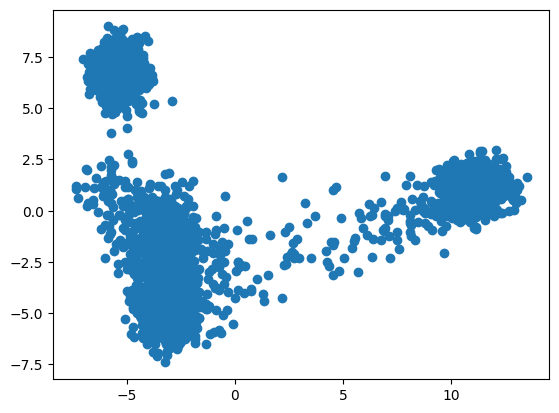

In [55]:
import matplotlib.pyplot as plt
plt.scatter(x=to_plot[:, 0], y=to_plot[:,1])

In [56]:
df_plot = df[non_snp_column].copy()
df_plot

,Population code,Sample
0,GBR,HG00096
1,GBR,HG00097
2,GBR,HG00099
3,GBR,HG00100
4,GBR,HG00101
...,...,...
2499,GIH,NA21137
2500,GIH,NA21141
2501,GIH,NA21142
2502,GIH,NA21143


In [57]:
df_plot['PC1'] = to_plot[:,0]
df_plot['PC2'] = to_plot[:, 0]
df_plot

,Population code,Sample,PC1,PC2
0,GBR,HG00096,-2.829911,-2.829911
1,GBR,HG00097,-3.297505,-3.297505
2,GBR,HG00099,-2.552067,-2.552067
3,GBR,HG00100,-3.533480,-3.533480
4,GBR,HG00101,-4.063304,-4.063304
...,...,...,...,...
2499,GIH,NA21137,-3.945841,-3.945841
2500,GIH,NA21141,-4.500771,-4.500771
2501,GIH,NA21142,-4.225763,-4.225763
2502,GIH,NA21143,-2.392436,-2.392436


<Axes: >

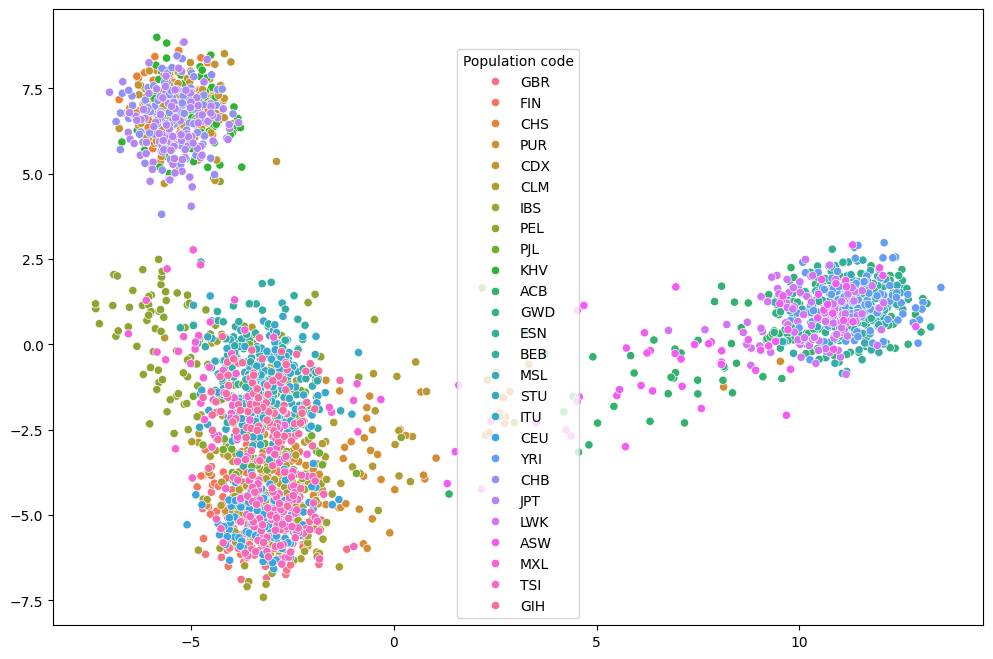

In [59]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.scatterplot(x=to_plot[:, 0], y=to_plot[:,1], data=df_plot, hue="Population code") #Hue add to divide feature

In [60]:
pop = pd.read_csv('igsr_populations.tsv', sep='\t')
pop

,Population code,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,CHS,CHS,Southern Han Chinese,Han Chinese South,23.133330,113.266667,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,KHV,KHV,Kinh Vietnamese,"Kinh in Ho Chi Minh City, Vietnam",10.780000,106.680000,EAS,East Asian Ancestry,#778500,3,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,NaN,BrahminSGDP,Brahmin,Brahmin in India (SGDP),17.700000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
3,NaN,MiaoSGDP,Miao,Miao in China (SGDP),28.000000,109.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project
4,NaN,KyrgyzSGDP,Kyrgyz,Kyrgyz in Kyrgyzystan (SGDP),42.900000,74.600000,NaN,Central Asia and Siberia (SGDP),#01daa0,15,Simons Genome Diversity Project
...,...,...,...,...,...,...,...,...,...,...,...
207,NaN,RelliSGDP,Relli,Relli in India (SGDP),17.700000,83.300000,NaN,South Asia (SGDP),#008c1e,18,Simons Genome Diversity Project
208,NaN,SardinianSGDP,Sardinian,Sardinian in Italy (SGDP),40.000000,9.000000,NaN,West Eurasia (SGDP),#001f54,19,Simons Genome Diversity Project
209,NaN,DinkaSGDP,Dinka,Dinka in Sudan (SGDP),8.794444,27.400000,NaN,Africa (SGDP),#12eeff,13,Simons Genome Diversity Project
210,NaN,NaxiSGDP,Naxi,Naxi in China (SGDP),26.000000,100.000000,NaN,East Asia (SGDP),#ff48de,16,Simons Genome Diversity Project


In [61]:
df_plot = df_plot.merge(pop, on='Population code', how='inner')

In [62]:
df_plot

,Population code,Sample,PC1,PC2,Population elastic ID,Population name,Population description,Population latitude,Population longitude,Superpopulation code,Superpopulation name,Superpopulation display colour,Superpopulation display order,Data collections
0,GBR,HG00096,-2.829911,-2.829911,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
1,GBR,HG00097,-3.297505,-3.297505,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2,GBR,HG00099,-2.552067,-2.552067,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
3,GBR,HG00100,-3.533480,-3.533480,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
4,GBR,HG00101,-4.063304,-4.063304,GBR,British,British in England and Scotland,52.486243,-1.890401,EUR,European Ancestry,#018ead,4,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2499,GIH,NA21137,-3.945841,-3.945841,GIH,Gujarati,"Gujarati Indians in Houston, TX",29.758900,-95.367700,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2500,GIH,NA21141,-4.500771,-4.500771,GIH,Gujarati,"Gujarati Indians in Houston, TX",29.758900,-95.367700,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2501,GIH,NA21142,-4.225763,-4.225763,GIH,Gujarati,"Gujarati Indians in Houston, TX",29.758900,-95.367700,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
2502,GIH,NA21143,-2.392436,-2.392436,GIH,Gujarati,"Gujarati Indians in Houston, TX",29.758900,-95.367700,SAS,South Asian Ancestry,#c44cfd,5,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."


<Axes: >

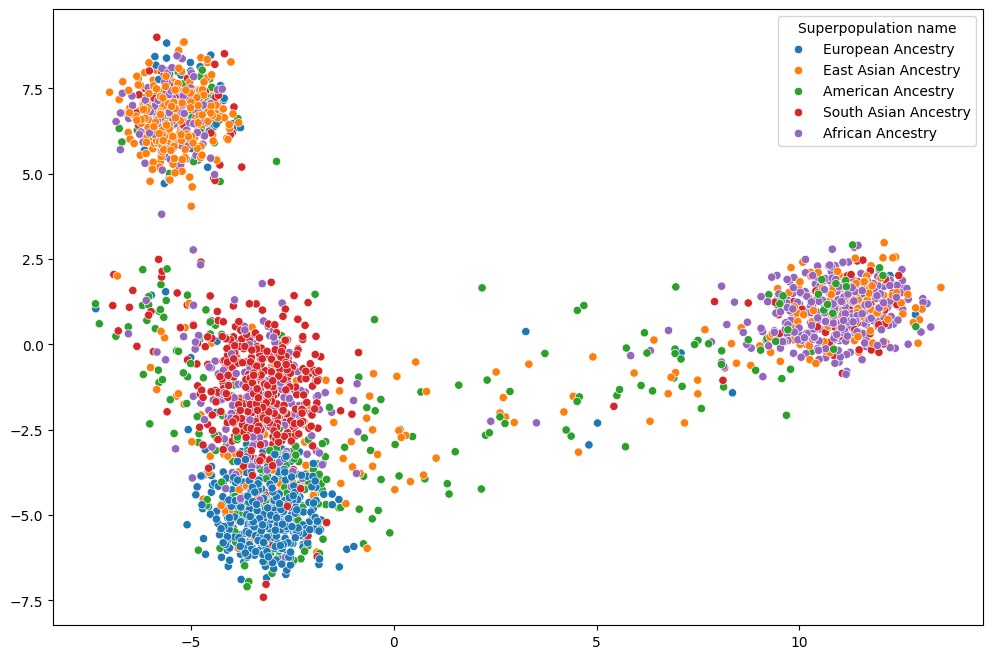

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=to_plot[:, 0], y=to_plot[:,1], data=df_plot, hue="Superpopulation name") #Hue add to divide feature

In [10]:
geno_matrix = gt.to_n_alt()

In [11]:
variants = chr_22['variants/CHROM']
positions = chr_22['variants/POS']
refs = chr_22['variants/REF']
alts = chr_22['variants/ALT']
sample_ids = chr_22['samples']

# Create a DataFrame of variants
variants_df = pd.DataFrame({
    'Chromosome': variants,
    'Position': positions,
    'REF': refs,
    'ALT': [alt[0] for alt in alts],  # ALT is an array; take the first element
})

variants_df

NameError: name 'chr_22' is not defined

In [ ]:
genotypes = chr_22['calldata/GT']
gt = allel.GenotypeArray(genotypes)
ac = gt.count_alleles()
af = ac.to_frequencies()[:, 1]  # Frequency of the alternate allele
plt.hist(af, bins=50)
plt.xlabel('Allele Frequency')
plt.ylabel('Number of Variants')
plt.title('Allele Frequency Spectrum')
plt.show()

In [ ]:
geno_matrix = gt.to_n_alt().T  # Transpose to get samples as rows
geno_matrix.shape  # Should be (num_samples, num_variants)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
geno_std = scaler.fit_transform(geno_matrix)

pca = PCA(n_components = 0.8)
principal_components = pca.fit(geno_std)

In [ ]:
pca_df = pd.DataFrame(principal_components.components_.T, columns=[f'PC{i}' for i in range(principal_components.n_components_)])
pca_df

In [ ]:
sample_info = pd.read_csv(FOLDER_1000G+'integrated_call_samples_v3.20130502.ALL.panel', sep='\t')
merged_data = pd.concat([sample_info, pca_df], axis=1)
merged_data

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=merged_data,
    x='PC0',
    y='PC1',
    hue='super_pop',
    palette='Set1'
)
plt.title('PCA of Genomic Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Superpopulation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
